In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [59]:
data=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [60]:
data.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


# Check for nulls

In [61]:
data.isna().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

# check_duplicates

In [62]:
data.duplicated().sum()

0

# info

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

# Target_variable

In [64]:
data['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

Imabalanced

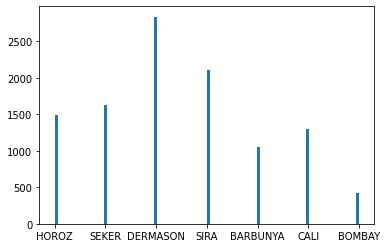

In [65]:
plt.hist(data['y'],bins=int(np.sqrt(len(data['y']))))
plt.show()

# Balance

In [66]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='all')
X=data.drop('y',axis=1)
X_train_copy,y_train_copy = oversample.fit_resample(X,data[['y']])

In [67]:
data=pd.concat([X_train_copy,y_train_copy],axis=1)

https://towardsdatascience.com/how-to-handle-multiclass-imbalanced-data-say-no-to-smote-e9a7f393c310

# Visualize_features

In [68]:
def visualize_data(data):
    data_visualize=data.copy()
    target_visualize=data_visualize['y']
    data_visualize.drop(['ID','y'],axis=1,inplace=True)
    for col in data_visualize.columns:
            sns.boxplot(target_visualize,data_visualize[col])
            plt.show()

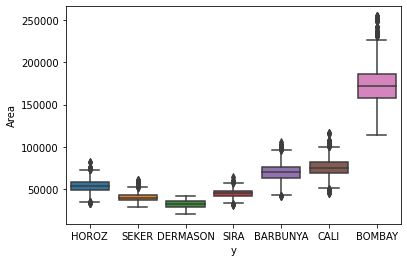

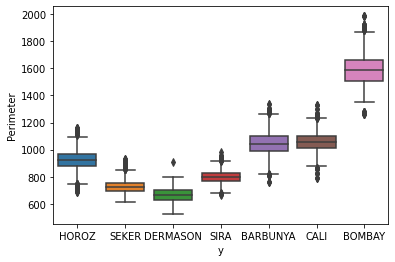

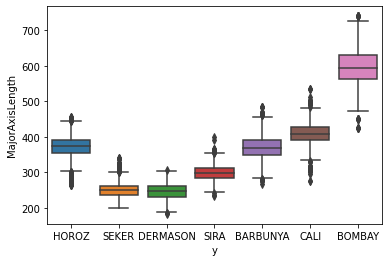

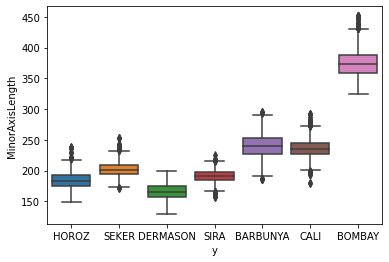

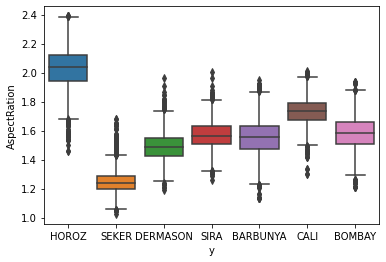

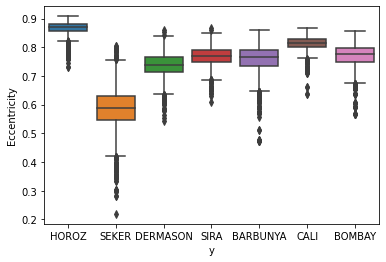

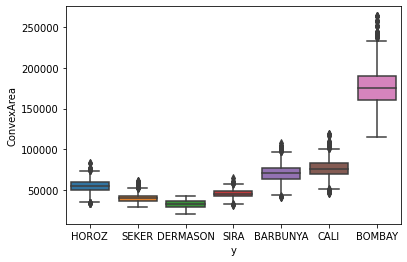

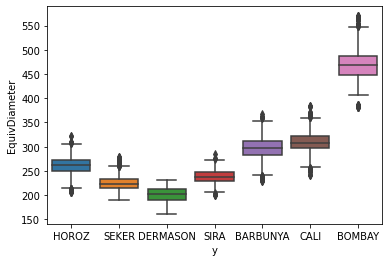

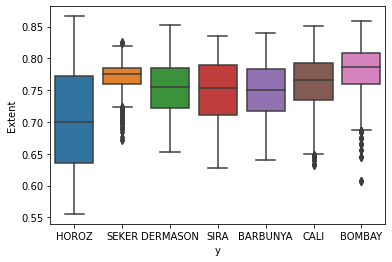

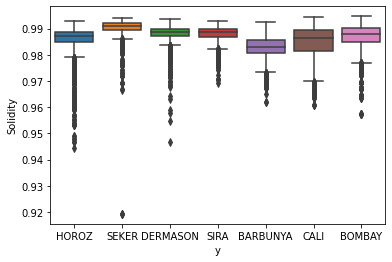

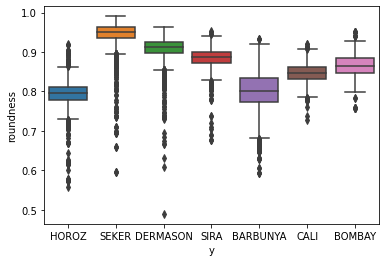

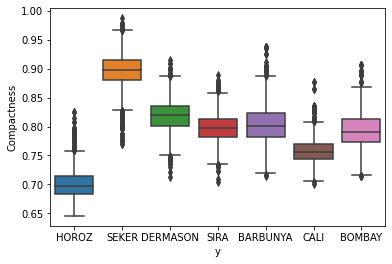

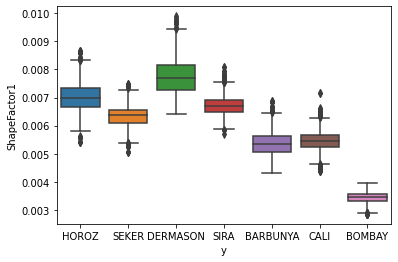

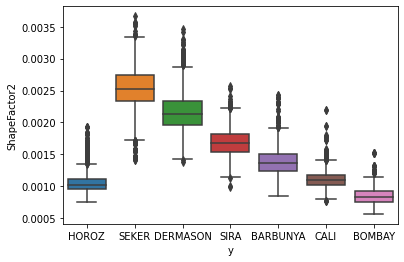

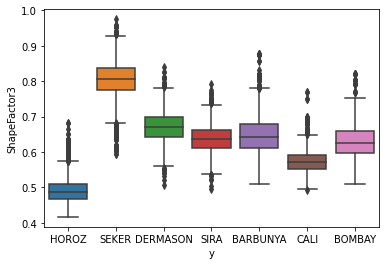

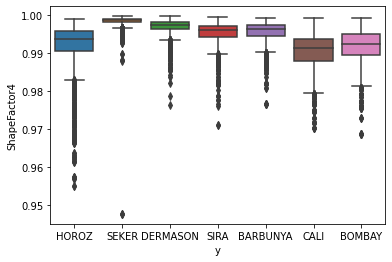

In [69]:
visualize_data(data)

notes: 

1-some features have an overlapping between boxes which indicates that they are not doing well in differentating between 

classes.

2-there is huge amount of oultiers

# Feature importnace

1-for decision trees

In [70]:
def Decision_tree_importance(data):
    from sklearn.tree import DecisionTreeClassifier
    y=data['y']
    X=data.drop('y',axis=1)
    clf=DecisionTreeClassifier()
    clf.fit(X,y)
    importances=clf.feature_importances_
    forest_importances = pd.Series(importances, index=X.columns)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=forest_importances, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

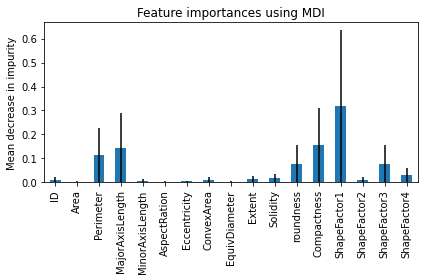

In [71]:
Decision_tree_importance(data)

# Skewness and oultiers

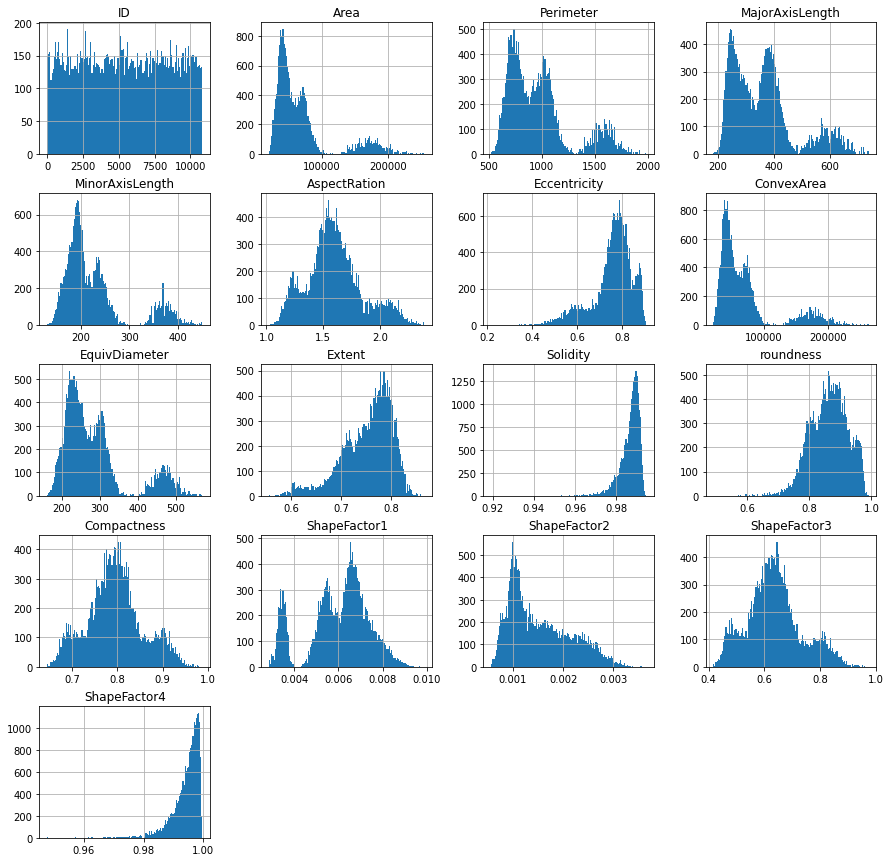

In [72]:
data.hist(bins=int(np.sqrt(len(data))),figsize=(15,15));

In [73]:
data.skew()

<ipython-input-73-b3b431164adb>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


ID                 0.004019
Area               1.724927
Perimeter          1.142140
MajorAxisLength    1.023802
MinorAxisLength    1.428487
AspectRation       0.460964
Eccentricity      -1.181873
ConvexArea         1.722753
EquivDiameter      1.320471
Extent            -0.945142
Solidity          -2.183696
roundness         -0.417329
Compactness        0.178491
ShapeFactor1      -0.479734
ShapeFactor2       0.665180
ShapeFactor3       0.384255
ShapeFactor4      -2.188713
dtype: float64

In [74]:
def display_skew_kurt(df):
    skew= df.select_dtypes(np.number).skew()
    abs_skew = abs(skew)
    kurt = df.select_dtypes(np.number).kurt()
    skew_kurt_table = pd.concat([skew,abs_skew,kurt], axis = 1,
                                keys =['Skew','Absolute Skew','Kurtosis']).sort_values("Skew",ascending = False)
    skew_kurt_table['Skewed'] = skew_kurt_table['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
    return skew_kurt_table

In [75]:
skewness_check=display_skew_kurt(data)
skewness_check   

,Skew,Absolute Skew,Kurtosis,Skewed
Area,1.724927,1.724927,1.981009,True
ConvexArea,1.722753,1.722753,1.986154,True
MinorAxisLength,1.428487,1.428487,1.068811,True
EquivDiameter,1.320471,1.320471,0.877287,True
Perimeter,1.142140,1.142140,0.543047,True
MajorAxisLength,1.023802,1.023802,0.436430,True
ShapeFactor2,0.665180,0.665180,-0.562005,True
AspectRation,0.460964,0.460964,0.061001,False
ShapeFactor3,0.384255,0.384255,-0.054789,False
Compactness,0.178491,0.178491,-0.175195,False


In [76]:
skewed_columns=skewness_check.index[skewness_check['Skewed'] == True].tolist()
len(skewed_columns)

11

from 

-0.5 to 0.5..................no skewness

0.5 to 1 OR -0.5 to -1.........moderate skewness

if > 1  or <-1 .....................high skewness

# Correlation 

In [77]:
def encode_target(data):
    data['y'].replace({'DERMASON':0,'SIRA':1,'SEKER':2,'HOROZ':3,'CALI':4,'BARBUNYA':5,'BOMBAY':6},inplace=True)
    return data

In [78]:
def decode_target(data):
    data['y'].replace({0:'DERMASON',1:'SIRA',2:'SEKER',3:'HOROZ',4:'CALI',5:'BARBUNYA',6:'BOMBAY'},inplace=True)
    return data

In [79]:
data_encoded=encode_target(data)
data_encoded

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,3
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,2
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,0
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,0
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19854,5342,45595,801.717,301.092828,193.505323,1.555992,0.766138,46054,240.942643,0.769926,0.990033,0.891425,0.800227,0.006604,0.001670,0.640363,0.996401,1
19855,7523,41517,752.867,271.567772,195.344554,1.390199,0.694677,41977,229.915389,0.793263,0.989042,0.920448,0.846623,0.006541,0.002073,0.716770,0.996452,1
19856,2496,38651,728.810,266.628867,184.935613,1.441739,0.720354,39139,221.837737,0.747197,0.987532,0.914412,0.832009,0.006898,0.002039,0.692240,0.998029,1
19857,9278,51560,850.918,316.862223,208.495041,1.519759,0.753019,52472,256.219107,0.785724,0.982619,0.894844,0.808614,0.006146,0.001621,0.653856,0.993704,1


In [80]:
data_encoded.corr()['y'].sort_values(ascending=False)

y                  1.000000
Perimeter          0.864866
EquivDiameter      0.842862
MajorAxisLength    0.833413
MinorAxisLength    0.811268
ConvexArea         0.791224
Area               0.790208
Eccentricity       0.241628
AspectRation       0.211851
Extent             0.095956
ID                -0.001340
Compactness       -0.239897
ShapeFactor3      -0.244494
Solidity          -0.282381
ShapeFactor4      -0.350024
roundness         -0.467362
ShapeFactor2      -0.691227
ShapeFactor1      -0.860087
Name: y, dtype: float64

In [81]:
correlation=data_encoded.corr()
correlation.style.background_gradient(cmap='coolwarm')

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,1.000000,-0.020201,-0.014332,-0.017169,-0.016473,-0.003419,-0.005496,-0.019849,-0.017302,-0.013620,-0.026882,-0.016010,0.004279,0.009036,0.008512,0.004553,0.001907,-0.001340
Area,-0.020201,1.000000,0.978859,0.958491,0.974810,0.122522,0.213584,0.999951,0.991331,0.196581,-0.118135,-0.195615,-0.174304,-0.900915,-0.659747,-0.187037,-0.358917,0.790208
Perimeter,-0.014332,0.978859,1.000000,0.985216,0.952659,0.236961,0.319672,0.979476,0.994143,0.137982,-0.214834,-0.363635,-0.288079,-0.915838,-0.763131,-0.299828,-0.416333,0.864866
MajorAxisLength,-0.017169,0.958491,0.985216,1.000000,0.901115,0.376653,0.443887,0.959025,0.975857,0.091746,-0.201331,-0.400932,-0.423774,-0.856125,-0.834425,-0.433540,-0.465018,0.833413
MinorAxisLength,-0.016473,0.974810,0.952659,0.901115,1.000000,-0.053588,0.045978,0.974554,0.973897,0.255980,-0.096318,-0.106947,0.001076,-0.960172,-0.556838,-0.012666,-0.293339,0.811268
AspectRation,-0.003419,0.122522,0.236961,0.376653,-0.053588,1.000000,0.924902,0.123923,0.169511,-0.365483,-0.244569,-0.721006,-0.987191,0.077044,-0.755786,-0.977963,-0.424094,0.211851
Eccentricity,-0.005496,0.213584,0.319672,0.443887,0.045978,0.924902,1.000000,0.215132,0.258537,-0.297343,-0.287184,-0.701386,-0.971279,-0.012628,-0.826137,-0.981806,-0.446853,0.241628
ConvexArea,-0.019849,0.999951,0.979476,0.959025,0.974554,0.123923,0.215132,1.000000,0.991444,0.195083,-0.126490,-0.199525,-0.175959,-0.900919,-0.660962,-0.188709,-0.364354,0.791224
EquivDiameter,-0.017302,0.991331,0.994143,0.975857,0.973897,0.169511,0.258537,0.991444,1.000000,0.177620,-0.150851,-0.263329,-0.221921,-0.930292,-0.717840,-0.234454,-0.385515,0.842862
Extent,-0.013620,0.196581,0.137982,0.091746,0.255980,-0.365483,-0.297343,0.195083,0.177620,1.000000,0.173039,0.326024,0.339764,-0.257070,0.134461,0.330687,0.088520,0.095956


# Preprocessing

In [82]:
def remove_outliers(data):
    z_scores = stats. zscore(data[skewed_columns]) 
    abs_z_scores = np. abs(z_scores)
    filtered_entries = (abs_z_scores < 3). all(axis=1)
    new_df = data[filtered_entries]
    return new_df
    

In [83]:
data_new_features=data.copy()

In [84]:
data_new_features['Equivalent Spherical Volume']=(4/3)*np.pi*np.sqrt(data_new_features['Area']/np.pi)**3


In [85]:
data_new_features.corr()['y'].sort_values(ascending=False)

y                              1.000000
Perimeter                      0.864866
EquivDiameter                  0.842862
MajorAxisLength                0.833413
MinorAxisLength                0.811268
ConvexArea                     0.791224
Area                           0.790208
Equivalent Spherical Volume    0.735291
Eccentricity                   0.241628
AspectRation                   0.211851
Extent                         0.095956
ID                            -0.001340
Compactness                   -0.239897
ShapeFactor3                  -0.244494
Solidity                      -0.282381
ShapeFactor4                  -0.350024
roundness                     -0.467362
ShapeFactor2                  -0.691227
ShapeFactor1                  -0.860087
Name: y, dtype: float64

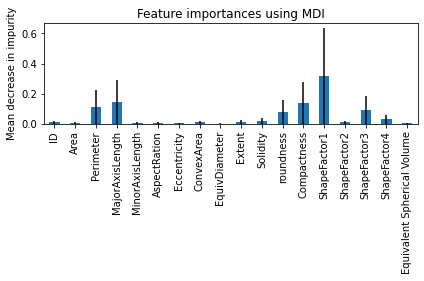

In [86]:
Decision_tree_importance(data_new_features)

In [87]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

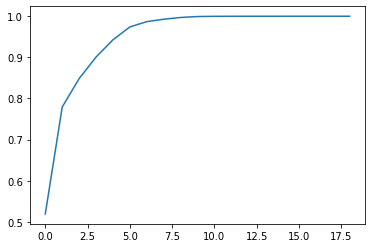

In [88]:
from sklearn.decomposition import PCA
data_new_features=scale.fit_transform(data_new_features)
pca=PCA()
pca.fit(data_new_features)
exp_var=pca.explained_variance_ratio_
exp_cumsum=np.cumsum(exp_var)
plt.plot(exp_cumsum)

In [110]:
pca=PCA(n_components=6)

In [111]:
def data_prep (data,test=False):
    if test==True:
        id_col=data['ID']
        data_scaled=scale.transform(data)
        data_scaled=pca.transform(data_scaled)
        data_scaled=pd.DataFrame(data_scaled)
        return data_scaled, id_col
    else :
        new_df=remove_outliers(data)
        labels=new_df['y']
        new_df=new_df.drop('y',axis=1)
        data_scaled=scale.fit_transform(new_df)
        data_scaled=pca.fit_transform(data_scaled)
        data_scaled=pd.DataFrame(data_scaled)
        return data_scaled,labels
    
    

In [112]:
final_data=data.copy()

In [113]:
y=final_data['y']
X=final_data.drop('y',axis=1)

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42,stratify=data['y'])

In [115]:
X_train['y']=y_train

In [116]:
X_train=encode_target(X_train)

In [117]:
data_to_model,labels=data_prep(X_train)

In [118]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(max_depth=6,n_estimators=200,learning_rate=0.05,random_state=42)

In [119]:
model.fit(data_to_model,labels)

LGBMClassifier(learning_rate=0.05, max_depth=6, n_estimators=200,
               random_state=42)

In [120]:
X_val,_=data_prep(X_val,test=True)

In [121]:
predictions=model.predict(X_val)

In [122]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,plot_confusion_matrix

In [123]:
f1_score(y_val,predictions,average='micro')

0.9647532729103726

In [124]:
data_test_to_model,ID=data_prep(data_test,test=True)

C:\Users\Honda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


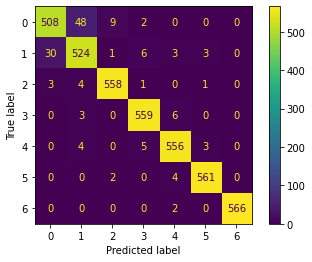

In [125]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(model,X_val,y_val);

In [126]:
predictions=model.predict(data_test_to_model)
predictions

array([3, 0, 5, ..., 3, 0, 1], dtype=int64)

In [127]:
data_test_to_model['y']=predictions
data_test_to_model

,0,1,2,3,4,5,y
0,4.054833,5.436202,8.334792,0.130472,1.039435,-5.111091,3
1,-3.586980,0.229368,0.309825,-1.679889,0.416128,-0.014017,0
2,-1.052232,-0.837096,2.797661,-1.256741,-0.014672,0.925942,5
3,-4.154711,0.647755,0.203546,-1.714361,-0.517469,-0.466543,0
4,3.737837,-2.838114,0.250949,-1.741700,0.520255,-0.203911,6
...,...,...,...,...,...,...,...
2704,1.707236,2.022583,0.360500,-2.542741,0.712482,-0.133050,4
2705,-4.139561,-2.959389,0.444700,-2.569931,-0.206463,-0.578699,2
2706,4.921523,6.011124,8.952754,-0.591923,1.254811,-5.840824,3
2707,-2.566009,0.789063,0.892800,-2.474026,-0.312403,0.023770,0


In [128]:
s=decode_target(data_test_to_model)
s

,0,1,2,3,4,5,y
0,4.054833,5.436202,8.334792,0.130472,1.039435,-5.111091,HOROZ
1,-3.586980,0.229368,0.309825,-1.679889,0.416128,-0.014017,DERMASON
2,-1.052232,-0.837096,2.797661,-1.256741,-0.014672,0.925942,BARBUNYA
3,-4.154711,0.647755,0.203546,-1.714361,-0.517469,-0.466543,DERMASON
4,3.737837,-2.838114,0.250949,-1.741700,0.520255,-0.203911,BOMBAY
...,...,...,...,...,...,...,...
2704,1.707236,2.022583,0.360500,-2.542741,0.712482,-0.133050,CALI
2705,-4.139561,-2.959389,0.444700,-2.569931,-0.206463,-0.578699,SEKER
2706,4.921523,6.011124,8.952754,-0.591923,1.254811,-5.840824,HOROZ
2707,-2.566009,0.789063,0.892800,-2.474026,-0.312403,0.023770,DERMASON


In [129]:
f=pd.concat([ID,s['y']],axis=1)

In [130]:
f

,ID,y
0,10834,HOROZ
1,10835,DERMASON
2,10836,BARBUNYA
3,10837,DERMASON
4,10838,BOMBAY
...,...,...
2704,13538,CALI
2705,13539,SEKER
2706,13540,HOROZ
2707,13541,DERMASON
